<a href="https://colab.research.google.com/github/luissousa/GA-with-python-packtbook/blob/main/Chapter03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 03 - OneMax problem GA

Esse é o problema de algoritmo genético que basicamente é o hello world desse tipo de problema.
No caso do problema de otimização OneMax existem uma população de invíduols que possuem genes codado como zero e un´s e se procura a solucção do problema o indivíduo que tem o mais alto valor "fitness", nesse caso já se sabe a priori que o indivíduo é o que possuir todos os genes iguais a 1´s, porém é essa resposta que o algoritmo deverá nos informar usando os operadores genéticos de seleção, crossover e mutação.
Esse é um caso particular de teste para nos familiarizarmos com esses operadores e a escolha do tamanho e tipo de gene escolhido, porém a regra desse tipo de algoritmo de otimização é não sabermos qual é o valor final procurado e isso ficará a cargo da solução heurística encontrada

##Setup

In [ ]:
!pip install deap

     |████████████████████████████████| 160 kB 25.2 MB/s 


In [ ]:
from deap import base, creator, tools, algorithms
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#problem constants?
ONE_MAX_LENGTH = 100 #lenght of bit string to be optimized
#Genetic algorithm constants?
POPULATION_SIZE = 200 #number of individuals in population
P_CROSSOVER = 0.9 #probability for crossover
P_MUTATION = 0.1 #probability for mutating an idividual
MAX_GENERATIONS = 50 #max number of generations for stopping condition


In [ ]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [ ]:
toolbox = base.Toolbox()
toolbox.register("zeroOrone",random.randint,0,1)

In [ ]:
creator.create("FitnessMax",base.Fitness,weights=(1.0,))

In [ ]:
creator.create("Individual",list,fitness=creator.FitnessMax)

In [ ]:
toolbox.register("individualCreator",tools.initRepeat,creator.Individual,toolbox.zeroOrone,ONE_MAX_LENGTH)

In [ ]:
toolbox.register("populationCreator",tools.initRepeat,list,toolbox.individualCreator)

In [ ]:
def oneMaxFitness(individual):
  return sum(individual), #return a tuple

In [ ]:
toolbox.register("evaluate",oneMaxFitness)

In [ ]:
toolbox.register("select",tools.selTournament,tournsize=3)
toolbox.register("mate",tools.cxOnePoint)
toolbox.register("mutate",tools.mutFlipBit,indpb=1.0/ONE_MAX_LENGTH)

##Envolving the solution

In [ ]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
generationCounter = 0

In [ ]:
fitnessValues = list(map(toolbox.evaluate,population))

In [ ]:
for individual, fitnessValue in zip(population, fitnessValues):
        individual.fitness.values = fitnessValue

In [ ]:
fitnessValues = [individual.fitness.values[0] for individual in population]

In [ ]:
maxFitnessValues = []
meanFitnessValues = []

In [ ]:
while max(fitnessValues) < ONE_MAX_LENGTH and generationCounter < MAX_GENERATIONS:
        # update counter:
        generationCounter = generationCounter + 1

        # apply the selection operator, to select the next generation's individuals:
        offspring = toolbox.select(population, len(population))
        # clone the selected individuals:
        offspring = list(map(toolbox.clone, offspring))

        # apply the crossover operator to pairs of offspring:
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < P_CROSSOVER:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < P_MUTATION:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # calculate fitness for the individuals with no previous calculated fitness value:
        freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
        freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
        for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
            individual.fitness.values = fitnessValue

        # replace the current population with the offspring:
        population[:] = offspring

        # collect fitnessValues into a list, update statistics and print:
        fitnessValues = [ind.fitness.values[0] for ind in population]

        maxFitness = max(fitnessValues)
        meanFitness = sum(fitnessValues) / len(population)
        maxFitnessValues.append(maxFitness)
        meanFitnessValues.append(meanFitness)
        print("- Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generationCounter, maxFitness, meanFitness))

        # find and print best individual:
        best_index = fitnessValues.index(max(fitnessValues))
        print("Best Individual = ", *population[best_index], "\n")

- Generation 1: Max Fitness = 65.0, Avg Fitness = 53.575
Best Individual =  1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

- Generation 2: Max Fitness = 66.0, Avg Fitness = 56.855
Best Individual =  1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

- Generation 3: Max Fitness = 69.0, Avg Fitness = 59.42
Best Individual =  1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 

- Generation 4: Max Fitness = 70.0, Avg Fitness = 62.03
Best Individual =  1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 

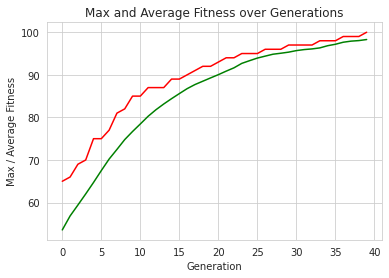

In [ ]:
# Genetic Algorithm is done - plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')
plt.show()

#Using built-in algorithms

Até o passo 13 é repetido a primeiro algoritmo do livro

##02-OneMax

Basicamente usando comandos internos do DEAP podemos eliminar o while loop, porém se perde com isso a condição de parada que antes mostrava que o programa convergia para a resposta em 40 gerações e agora o programa funciona até se esgotar a definição dada de parar com 50 gerações e caso se aumente o programa levará mais tempo funcionando, mesmo tendo encontrado a resposta a muitos ciclos computacionais antes.

In [ ]:
# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

In [ ]:
# perform the Genetic Algorithm flow:
population, logbook = algorithms.eaSimple(population, toolbox,
                                          cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS,
                                          stats=stats, verbose=True)

gen	nevals	max	avg  
0  	0     	100	98.29
1  	182   	100	98.55
2  	176   	100	98.915
3  	188   	100	99.195
4  	192   	100	99.595
5  	193   	100	99.82 
6  	189   	100	99.82 
7  	189   	100	99.895
8  	190   	100	99.875
9  	187   	100	99.83 
10 	184   	100	99.89 
11 	183   	100	99.885
12 	187   	100	99.845
13 	184   	100	99.915
14 	183   	100	99.94 
15 	182   	100	99.88 
16 	180   	100	99.905
17 	180   	100	99.89 
18 	181   	100	99.935
19 	190   	100	99.88 
20 	182   	100	99.9  
21 	181   	100	99.92 
22 	182   	100	99.895
23 	178   	100	99.89 
24 	177   	100	99.925
25 	188   	100	99.915
26 	180   	100	99.89 
27 	184   	100	99.885
28 	189   	100	99.905
29 	178   	100	99.905
30 	186   	100	99.9  
31 	183   	100	99.88 
32 	194   	100	99.925
33 	186   	100	99.93 
34 	185   	100	99.87 
35 	181   	100	99.82 
36 	179   	100	99.87 
37 	173   	100	99.92 
38 	189   	100	99.89 
39 	171   	100	99.91 
40 	182   	100	99.865
41 	177   	100	99.94 
42 	182   	100	99.84 
43 	181   	100	99.92 
44 	174   	10

In [ ]:
# Genetic Algorithm is done - extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

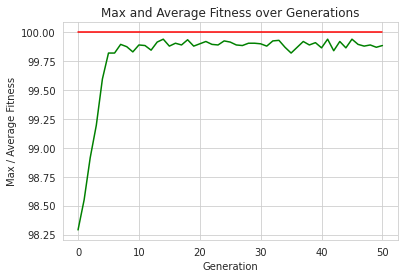

In [ ]:
# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')
plt.show()

##03-OneMax

Aproveitou-se até a célula 23

In [ ]:
# define the hall-of-fame object:
HALL_OF_FAME_SIZE = 10
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

In [ ]:
# perform the Genetic Algorithm flow with hof feature added:
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER,
                                          mutpb=P_MUTATION,ngen=MAX_GENERATIONS,
                                          stats=stats, halloffame=hof,
                                          verbose=True)

gen	nevals	max	avg  
0  	0     	100	99.89
1  	182   	100	99.89
2  	182   	100	99.93
3  	177   	100	99.9 
4  	189   	100	99.915
5  	188   	100	99.89 
6  	186   	100	99.915
7  	181   	100	99.855
8  	184   	100	99.88 
9  	191   	100	99.925
10 	178   	100	99.89 
11 	177   	100	99.92 
12 	180   	100	99.955
13 	190   	100	99.935
14 	181   	100	99.91 
15 	179   	100	99.9  
16 	172   	100	99.88 
17 	188   	100	99.885
18 	172   	100	99.88 
19 	184   	100	99.865
20 	185   	100	99.9  
21 	185   	100	99.94 
22 	188   	100	99.865
23 	181   	100	99.91 
24 	190   	100	99.945
25 	185   	100	99.82 
26 	180   	100	99.895
27 	176   	100	99.835
28 	176   	100	99.885
29 	177   	100	99.91 
30 	181   	100	99.875
31 	189   	100	99.905
32 	191   	100	99.925
33 	189   	100	99.905
34 	176   	100	99.9  
35 	179   	100	99.855
36 	183   	100	99.92 
37 	177   	100	99.915
38 	172   	100	99.885
39 	188   	100	99.885
40 	185   	100	99.91 
41 	184   	100	99.875
42 	187   	100	99.915
43 	180   	100	99.905
44 	185   	100	

In [ ]:
# print Hall of Fame info:
print("Hall of Fame Individuals = ", *hof.items, sep="\n")
print("Best Ever Individual = ", hof.items[0])

Hall of Fame Individuals = 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

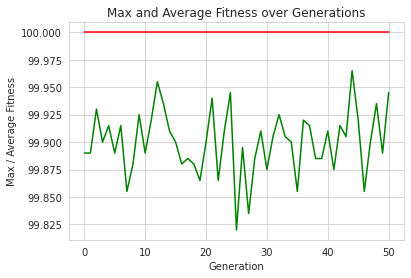

In [ ]:
# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')
plt.show()